In [1]:
#重点: 线性回归定义，损失函数，梯度下降算法，回归模型评估:MAE,MSE,欠拟合 过拟合出现原因及解决方法

In [ ]:
#线性回归：利用回归方程对一个或多个自变量(特征值)和因变量(目标值)之间关系进行建模的一种方式 <br>
#数学公式： ℎ_((𝑤)) =  𝑤_1 𝑥_1+〖 𝑤〗_2 𝑥_2 + 𝑤_3 𝑥_3 + …  + 𝑏 =  𝑤^𝑇 x+𝑏

In [2]:
from sklearn.linear_model import LinearRegression

In [4]:
def dm1_predictHeight():
    #身高和体重参数
    x = [[160], [166],  [172], [174],[180]]
    y = [56.3, 60.6, 65.1, 68.5, 75]
    #实例化线性回归模型estimator
    #lineRegression是正规方程法 fit_intercept=True 使用截距，否则为0 
    estimator=LinearRegression()
    estimator.fit(x,y)
    #斜率和截距
    print(estimator.coef_)
    print(estimator.intercept_)
    #模型预测
    ans=estimator.predict([[180]])
    print(ans)
dm1_predictHeight()    

[0.92942177]
-93.27346938775514
[74.02244898]


损失函数:衡量模型预测值和真实值差异的函数

梯度下降是机器学习中优化模型参数以最小化损失函数的核心算法
1. 基本概念
目标：找到使损失函数（预测误差）最小的模型参数。
核心思想：通过迭代调整参数，沿损失函数梯度的反方向（下降最快）逐步逼近最小值。

2. 关键步骤
初始化参数：随机选择初始参数（如权重θ）。
计算梯度：求损失函数对每个参数的偏导数（梯度∇J）。
更新参数：沿负梯度方向调整参数，公式为：
θ_new = θ_old - α * ∇J(θ_old)
学习率（α）：控制步长，需合理选择（太小收敛慢，太大会震荡）。

3. 数学示例（线性回归）
损失函数：均方误差
J(θ₀, θ₁) = (1 / 2m) * Σ(hθ(xⁱ) - yⁱ)²
梯度计算：
对θ₀的偏导：∂J/∂θ₀ = (1 / m) * Σ(hθ(xⁱ) - yⁱ)
对θ₁的偏导：∂J/∂θ₁ = (1 / m) * Σ(hθ(xⁱ) - yⁱ) * xⁱ
参数更新：同时更新θ₀和θ₁。

4. 变体与技巧
批量梯度下降：每次用全部数据计算梯度（稳定但慢）。
随机梯度下降（SGD）：每次随机选一个样本（快但波动大）。
小批量梯度下降：折中方案，常用（如32/64个样本为一组）。
特征缩放：归一化特征（如Z-score）以加速收敛。
学习率调整：可逐步衰减或使用自适应方法（如Adam）。

5. 关键点：
梯度是上升方向，反方向下降最快。
所有参数需同时更新。
学习率决定步长，需平衡速度和稳定性。

6. 常见问题
局部最优：高维问题中更可能遇到鞍点而非局部最优，SGD的噪声可能帮助逃脱。
收敛判断：损失变化小或梯度接近零时停止。
与正规方程对比：梯度下降适合大数据/高维，正规方程适合小数据（直接求逆矩阵）。

线性回归模型评估 MAE平均绝对误差 MSE均方误差 RMSE均方绝对误差 <br/>
MAE对误差大小不敏感
 RMSE会放大预测误差较大的样本的影响
 RMSE对异常数据敏感


波士顿房价预测

In [55]:
# from sklearn.datasets import load_boston #房价数据
from sklearn.preprocessing import StandardScaler #数据标准化 避免数据大小不一致，导致结果影响较大
from sklearn.model_selection import train_test_split #用于数据集划分
from sklearn.linear_model import LinearRegression #线性回归正规方程法
from sklearn.linear_model import SGDRegressor #梯度下降最小二乘法
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.linear_model import Ridge,RidgeCV

In [15]:
#波士顿房价数据 1.2版本删除了已经，需要通过其它方式获取
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [14]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [17]:
#数据集划分 特征，目标值-> 训练集，测试集，训练目标集，测试目标集
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=22)
#实例化标准化对象
transfer=StandardScaler()
#标准化
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#线性回归 正规方程方式求解
estimator=LinearRegression()
estimator.fit(x_train,y_train)
#模型评估
y_pred=estimator.predict(x_test)
print("预测值: ",y_pred)
print("模型权重系数，斜率",estimator.coef_)
print("模型偏置，截距",estimator.intercept_)
#模型评分
error=mean_squared_error(y_test,y_pred)
print("均方误差",error)

预测值:  [28.22944896 31.5122308  21.11612841 32.6663189  20.0023467  19.07315705
 21.09772798 19.61400153 19.61907059 32.87611987 20.97911561 27.52898011
 15.54701758 19.78630176 36.88641203 18.81202132  9.35912225 18.49452615
 30.66499315 24.30184448 19.08220837 34.11391208 29.81386585 17.51775647
 34.91026707 26.54967053 34.71035391 27.4268996  19.09095832 14.92742976
 30.86877936 15.88271775 37.17548808  7.72101675 16.24074861 17.19211608
  7.42140081 20.0098852  40.58481466 28.93190595 25.25404307 17.74970308
 38.76446932  6.87996052 21.80450956 25.29110265 20.427491   20.4698034
 17.25330064 26.12442519  8.48268143 27.50871869 30.58284841 16.56039764
  9.38919181 35.54434377 32.29801978 21.81298945 17.60263689 22.0804256
 23.49262401 24.10617033 20.1346492  38.5268066  24.58319594 19.78072415
 13.93429891  6.75507808 42.03759064 21.9215625  16.91352899 22.58327744
 40.76440704 21.3998946  36.89912238 27.19273661 20.97945544 20.37925063
 25.3536439  22.18729123 31.13342301 20.3945112

In [54]:
#对上面使用梯度下降法
x_train,x_test,y_train,y_test=train_test_split(data,target,random_state=22)
#标准化
transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.transform(x_test)
#实例化模型及训练
# estimator=SGDRegressor()
# 最大迭代次数，学习速率
estimator=SGDRegressor(max_iter=1000,learning_rate='constant',eta0=0.001)
estimator.fit(x_train,y_train)
#结果预测
y_pred=estimator.predict(x_test)
print("预测结果",y_pred)
print("权重系数，偏置分别为",estimator.coef_,estimator.intercept_)
#评分
error=mean_squared_error(y_test,y_pred)
print(error)

预测结果 [28.28851816 31.53982596 21.51036828 32.7146877  20.33065431 19.19151303
 21.38892132 19.48735819 19.7676907  32.74018724 21.38389418 27.20338019
 15.62966481 20.02489846 37.01598676 18.56133     9.93351622 18.67854317
 30.81414391 24.28913563 19.14562144 34.027646   29.52350284 17.43304441
 34.70243045 26.35950529 34.10760064 27.36910791 19.19160907 16.03852019
 30.77818569 14.25321595 37.41546388  9.05991192 16.48140495 16.75147428
  7.95272302 19.79165817 40.51809557 29.28185551 25.27186125 17.94134807
 39.57660718  6.74591242 21.52339744 24.92828198 21.18946812 20.73426423
 17.04879295 26.40349819  9.88795887 27.04197168 30.70912209 16.81795404
  9.65705606 35.38710195 31.16663764 23.16926066 17.62899016 21.90536249
 23.59335923 23.83611948 20.45681039 38.03011645 25.92108513 19.71220698
 14.25997104  6.7777073  42.62747374 21.82206241 16.56132617 22.71980752
 40.91424631 21.8051288  36.84612024 27.08281405 22.09596845 20.65523186
 25.35238012 24.16783014 31.50109322 20.183703

sklearn.linear_model.SGDRegressor(loss="squared_loss", fit_intercept=True, learning_rate ='constant', eta0=0.01)<br/>
SGDRegressor类实现了随机梯度下降学习，它支持不同的损失函数和正则化惩罚项，来拟合线性回归模型。<br/>
参数<br/>
loss（损失函数类型）eg：loss=”squared_loss<br/>
fit_intercept（是否计算偏置）<br/>
learning_rate （学习率策略）：string, optional ，可以配置学习率随着迭代次数不断减小<br/>
比如：学习率不断变小策略： ‘invscaling’: eta = eta0 / pow(t, power_t=0.25) <br/>
eta0=0.01  （学习率的值）		<br/>
属性<br/>
SGDRegressor.coef_ （回归系数）SGDRegressor.intercept_ （偏置）<br/>


欠拟合：模型在训练集上表现不好，在测试集上也表现不好。模型过于简单
过拟合：模型在训练集上表现好，在测试集上表现不好。模型过于复杂

欠拟合可以从数据，模型，算法角度，通过添加其他特征。组合，泛华，相关性三类特征是特征添加的重要手段<br/>
模型过于简单可通过添加二次项增加模型泛华能力

3.0750025765636577


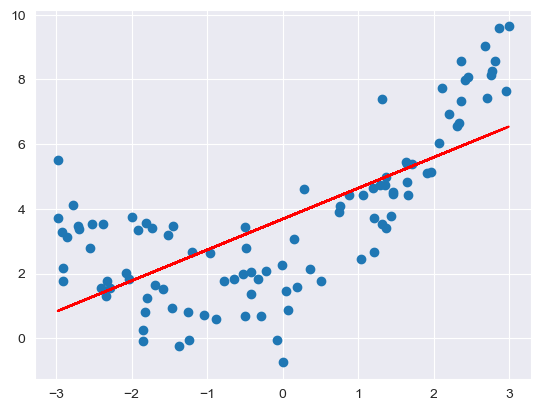

In [63]:
import matplotlib.pyplot as plt
#模拟欠拟合
np.random.seed(666)
x=np.random.uniform(-3,3,size=100)
y=0.5*x**2+x+2+np.random.normal(0,1,100)
estimator=LinearRegression()
X=x.reshape(-1,1)
estimator.fit(X,y)
y_pred=estimator.predict(X)
myret=mean_squared_error(y,y_pred)
print(myret)
#画图
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')

1.0987392142417858


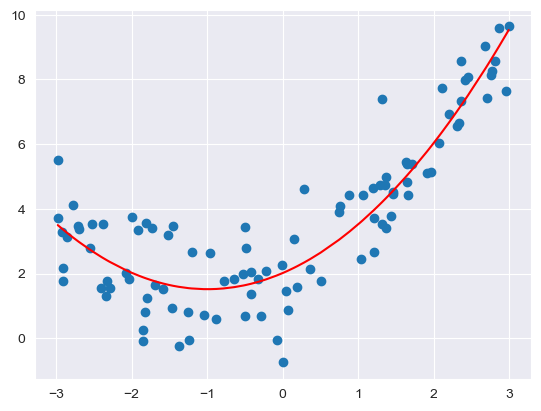

In [64]:
#模拟正好拟合
np.random.seed(666)
x=np.random.uniform(-3,3,size=100)
y=0.5*x**2+x+2+np.random.normal(0,1,100)
estimator=LinearRegression()
X=x.reshape(-1,1)
#正好拟合
X2=np.hstack([X,X**2])
estimator.fit(X2,y)
y_pred=estimator.predict(X2)
myret=mean_squared_error(y,y_pred)
print(myret)
#画图
plt.scatter(x,y)
plt.plot(np.sort(x),y_pred[np.argsort(x)],color='red')

过拟合出现的原因 原始特征过多，存在一些嘈杂特征， 模型过于复杂是因为模型尝试去兼顾各个测试数据点

重新清洗数据: 对于过多异常点数据、数据不纯的地方再处理<br/>
增大数据的训练量:对原来的数据训练的太过了，增加数据量的情况下，会缓解<br/>
正则化 解决模型过拟合的方法，在机器学习、深度学习中大量使用<br/>
减少特征维度，防止维灾难 由于特征多，样本数量少，导致学习不充分，泛化能力差


1.0217267597702384


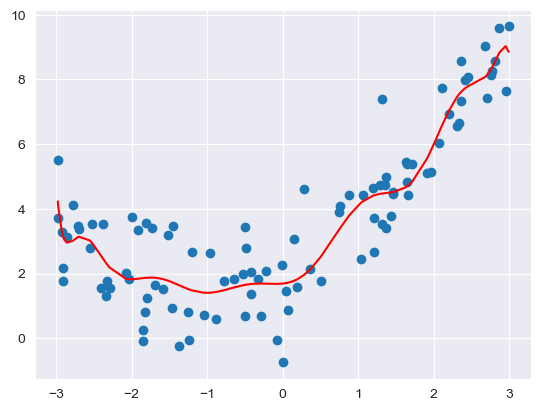

In [67]:
#模拟过拟合
np.random.seed(666)
x=np.random.uniform(-3,3,size=100)
y=0.5*x**2+x+2+np.random.normal(0,1,100)
estimator=LinearRegression()
X=x.reshape(-1,1)
#正好拟合
X2=np.hstack([X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10,X**11,X**12,X**13])
estimator.fit(X2,y)
y_pred=estimator.predict(X2)
myret=mean_squared_error(y,y_pred)
print(myret)
#画图
plt.scatter(x,y)
plt.plot(np.sort(x),y_pred[np.argsort(x)],color='red')

正则化是一种通过约束模型复杂度来减轻过拟合的技术<br/>
正则化的原理<br/>
损失函数中加入正则化项,原始的损失函数（如均方误差 MSE）会被修改为：<br/>
新损失函数=原始损失+λ⋅正则化项<br/>
其中：λ（alpha）是正则化系数，控制正则化的强度。
正则化项 对模型权重进行惩罚，防止其过大。
正则化的作用:限制权重的大小，使模型更简单。减少异常值或噪声对模型的影响。

参数选择alpha（λ）：<br/>
alpha 越大，正则化越强，权重越小（模型更简单）。<br/>
需通过交叉验证调整 alpha 的值。<br/>
对比 L1 和 L2<br/>
特性	      |  L1 正则化（Lasso）    |	    L2 正则化（Ridge）<br/>
权重稀疏性  |	部分权重为 0（特征选择） |   	权重接近 0 但不为 0<br/>
适用场景	  |  高维数据、特征选择	 |      共线性数据、保留所有特征<br/>
优化目标	  |  绝对值惩罚	         |      平方惩罚

1.101146043045581


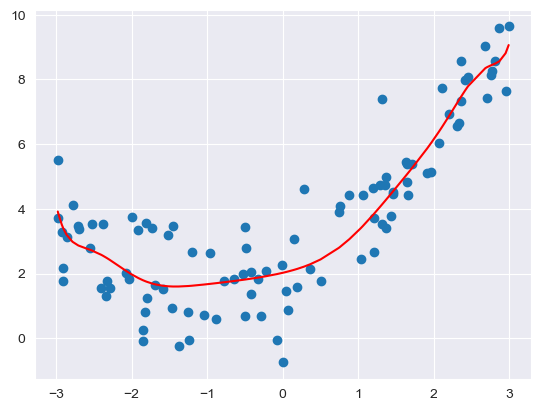

In [74]:
from sklearn.linear_model import Ridge #L2 岭回归
from sklearn.linear_model import Lasso #L1 Lasso回归
np.random.seed(666)
x=np.random.uniform(-3,3,size=100)
y=0.5*x**2+x+2+np.random.normal(0,1,100)
estimator=Ridge(alpha=10)
X=x.reshape(-1,1)
#正好拟合
X2=np.hstack([X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9,X**10,X**11,X**12,X**13])
estimator.fit(X2,y)
y_pred=estimator.predict(X2)
myret=mean_squared_error(y,y_pred)
print(myret)
#画图
plt.scatter(x,y)
plt.plot(np.sort(x),y_pred[np.argsort(x)],color='red')